<a href="https://colab.research.google.com/github/kebabee/ML-assiociative-memory/blob/main/modern_hopfield_network_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import zipfile
from io import BytesIO
from PIL import Image

# Define the URL of the raw hopfield_header.py file
hopfield_url = "https://raw.githubusercontent.com/kebabee/ML-assiociative-memory/bfa215afd00124cf2c32b26aea42381588e75982/hopfield_header.py"

# Download the hopfield_header.py file
response = requests.get(hopfield_url)

# Check if the request was successful
if response.status_code == 200:
    # Save the content to hopfield_header.py
    with open('hopfield_header.py', 'wb') as f:
        f.write(response.content)
    print("hopfield_header.py downloaded successfully.")
else:
    print("Failed to download hopfield_header.py.")

# Send a GET request to download the zip file
response = requests.get("https://github.com/kebabee/ML-assiociative-memory/raw/08eb242de52b29dd9ae769b8bb4af3714a884bab/letters/letters.zip")

# Check if the request was successful
if response.status_code == 200:
    # Read the content of the zip file
    zip_content = BytesIO(response.content)

    # Extract the zip file contents
    with zipfile.ZipFile(zip_content, 'r') as zip_ref:
        # Extract all contents to the 'letters' folder
        zip_ref.extractall('letters')
    print("Letters extraction successful.")
else:
    print("Failed to download the zip file.")


import hopfield_header as hopf


s1 = np.where(np.array(Image.open('letters/?.png'))[:,:,0]<128,1,-1).reshape(-1)
s2 = np.where(np.array(Image.open('letters/@.png'))[:,:,0]<128,1,-1).reshape(-1)
s3 = np.where(np.array(Image.open('letters/&.png'))[:,:,0]<128,1,-1).reshape(-1)
s4 = np.where(np.array(Image.open('letters/#.png'))[:,:,0]<128,1,-1).reshape(-1)
s5 = np.where(np.array(Image.open('letters/%.png'))[:,:,0]<128,1,-1).reshape(-1)
s6 = np.where(np.array(Image.open('letters/$.png'))[:,:,0]<128,1,-1).reshape(-1)
s7 = np.where(np.array(Image.open('letters/eu.png'))[:,:,0]<128,1,-1).reshape(-1)
s8 = np.where(np.array(Image.open('letters/inf.png'))[:,:,0]<128,1,-1).reshape(-1)
s9 = np.where(np.array(Image.open('letters/pi.png'))[:,:,0]<128,1,-1).reshape(-1)
s10 = np.where(np.array(Image.open('letters/ps.png'))[:,:,0]<128,1,-1).reshape(-1)
s11 = np.where(np.array(Image.open('letters/se.png'))[:,:,0]<128,1,-1).reshape(-1)
s12 = np.where(np.array(Image.open('letters/si.png'))[:,:,0]<128,1,-1).reshape(-1)
s13 = np.where(np.array(Image.open('letters/sm.png'))[:,:,0]<128,1,-1).reshape(-1)
s14 = np.where(np.array(Image.open('letters/us.png'))[:,:,0]<128,1,-1).reshape(-1)
s15 = np.where(np.array(Image.open('letters/al.png'))[:,:,0]<128,1,-1).reshape(-1)

n1 = np.where(np.array(Image.open('letters/1.png'))[:,:,0]<128,1,-1).reshape(-1)
n2 = np.where(np.array(Image.open('letters/2.png'))[:,:,0]<128,1,-1).reshape(-1)
n3 = np.where(np.array(Image.open('letters/3.png'))[:,:,0]<128,1,-1).reshape(-1)
n4 = np.where(np.array(Image.open('letters/4.png'))[:,:,0]<128,1,-1).reshape(-1)
n5 = np.where(np.array(Image.open('letters/5.png'))[:,:,0]<128,1,-1).reshape(-1)
n6 = np.where(np.array(Image.open('letters/6.png'))[:,:,0]<128,1,-1).reshape(-1)
n7 = np.where(np.array(Image.open('letters/7.png'))[:,:,0]<128,1,-1).reshape(-1)
n8 = np.where(np.array(Image.open('letters/8.png'))[:,:,0]<128,1,-1).reshape(-1)
n9 = np.where(np.array(Image.open('letters/9.png'))[:,:,0]<128,1,-1).reshape(-1)

A = np.where(np.array(Image.open('letters/A.png'))[:,:,0]<128,1,-1).reshape(-1)
B = np.where(np.array(Image.open('letters/B.png'))[:,:,0]<128,1,-1).reshape(-1)
C = np.where(np.array(Image.open('letters/C.png'))[:,:,0]<128,1,-1).reshape(-1)
D = np.where(np.array(Image.open('letters/D.png'))[:,:,0]<128,1,-1).reshape(-1)
E = np.where(np.array(Image.open('letters/E.png'))[:,:,0]<128,1,-1).reshape(-1)
F = np.where(np.array(Image.open('letters/F.png'))[:,:,0]<128,1,-1).reshape(-1)
G = np.where(np.array(Image.open('letters/G.png'))[:,:,0]<128,1,-1).reshape(-1)
H = np.where(np.array(Image.open('letters/H.png'))[:,:,0]<128,1,-1).reshape(-1)
I = np.where(np.array(Image.open('letters/I.png'))[:,:,0]<128,1,-1).reshape(-1)
J = np.where(np.array(Image.open('letters/J.png'))[:,:,0]<128,1,-1).reshape(-1)
K = np.where(np.array(Image.open('letters/K.png'))[:,:,0]<128,1,-1).reshape(-1)
L = np.where(np.array(Image.open('letters/L.png'))[:,:,0]<128,1,-1).reshape(-1)
M = np.where(np.array(Image.open('letters/M.png'))[:,:,0]<128,1,-1).reshape(-1)
N = np.where(np.array(Image.open('letters/N.png'))[:,:,0]<128,1,-1).reshape(-1)
O = np.where(np.array(Image.open('letters/O.png'))[:,:,0]<128,1,-1).reshape(-1)
P = np.where(np.array(Image.open('letters/P.png'))[:,:,0]<128,1,-1).reshape(-1)
Q = np.where(np.array(Image.open('letters/Q.png'))[:,:,0]<128,1,-1).reshape(-1)
R = np.where(np.array(Image.open('letters/R.png'))[:,:,0]<128,1,-1).reshape(-1)
S = np.where(np.array(Image.open('letters/S.png'))[:,:,0]<128,1,-1).reshape(-1)
T = np.where(np.array(Image.open('letters/T.png'))[:,:,0]<128,1,-1).reshape(-1)
U = np.where(np.array(Image.open('letters/U.png'))[:,:,0]<128,1,-1).reshape(-1)
W = np.where(np.array(Image.open('letters/W.png'))[:,:,0]<128,1,-1).reshape(-1)
X = np.where(np.array(Image.open('letters/X.png'))[:,:,0]<128,1,-1).reshape(-1)
Y = np.where(np.array(Image.open('letters/Y.png'))[:,:,0]<128,1,-1).reshape(-1)
Z = np.where(np.array(Image.open('letters/Z.png'))[:,:,0]<128,1,-1).reshape(-1)

letters = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,W,X,Y,Z,n1,n2,n3,n4,n5,n6,n7,n8,n9,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15]

noised_data = []
noised_data1 = letters.copy()

for i in range(len(letters)):
    noised_data.append(hopf.noise(letters[i], 40))

network1 = hopf.hopfield_net(256)
network1.set_patterns(letters)

hopfield_header.py downloaded successfully.
Letters extraction successful.


# Basic use of dense associative memory

Network patterns:

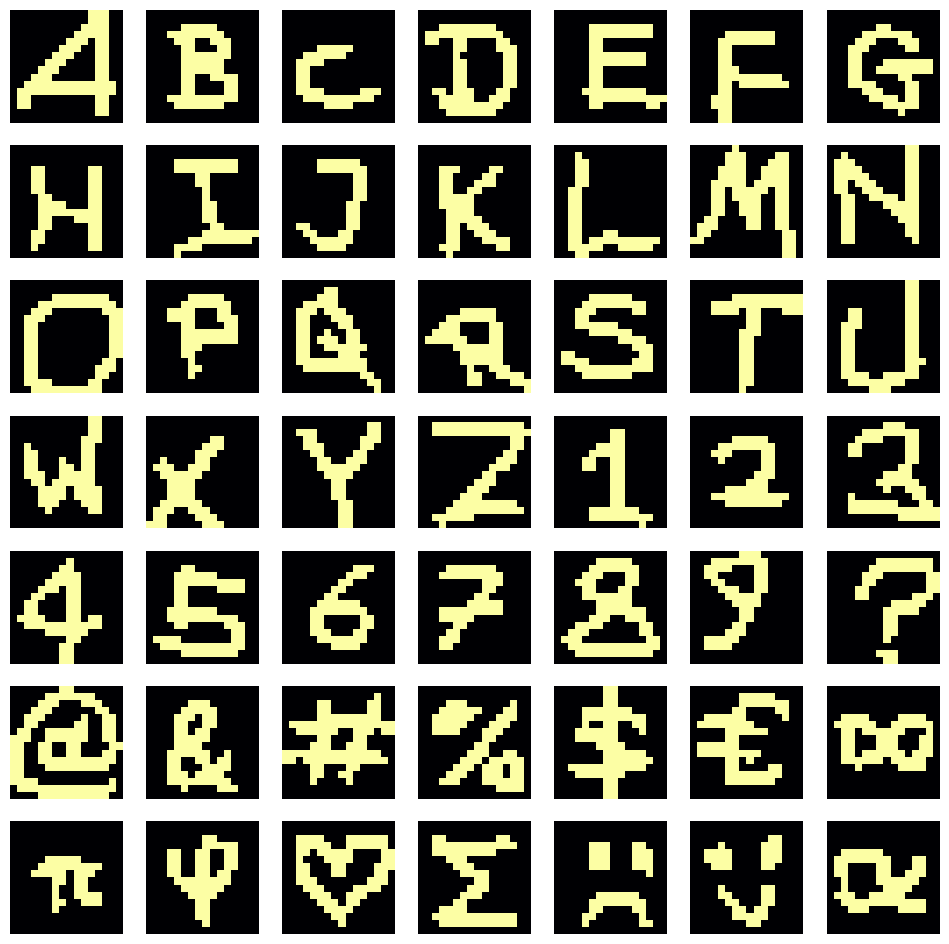

In [2]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(network1.patterns)):
  row, col = i // 7, i % 7
  axes[row, col].imshow(network1.patterns[i].reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

First test dataset:

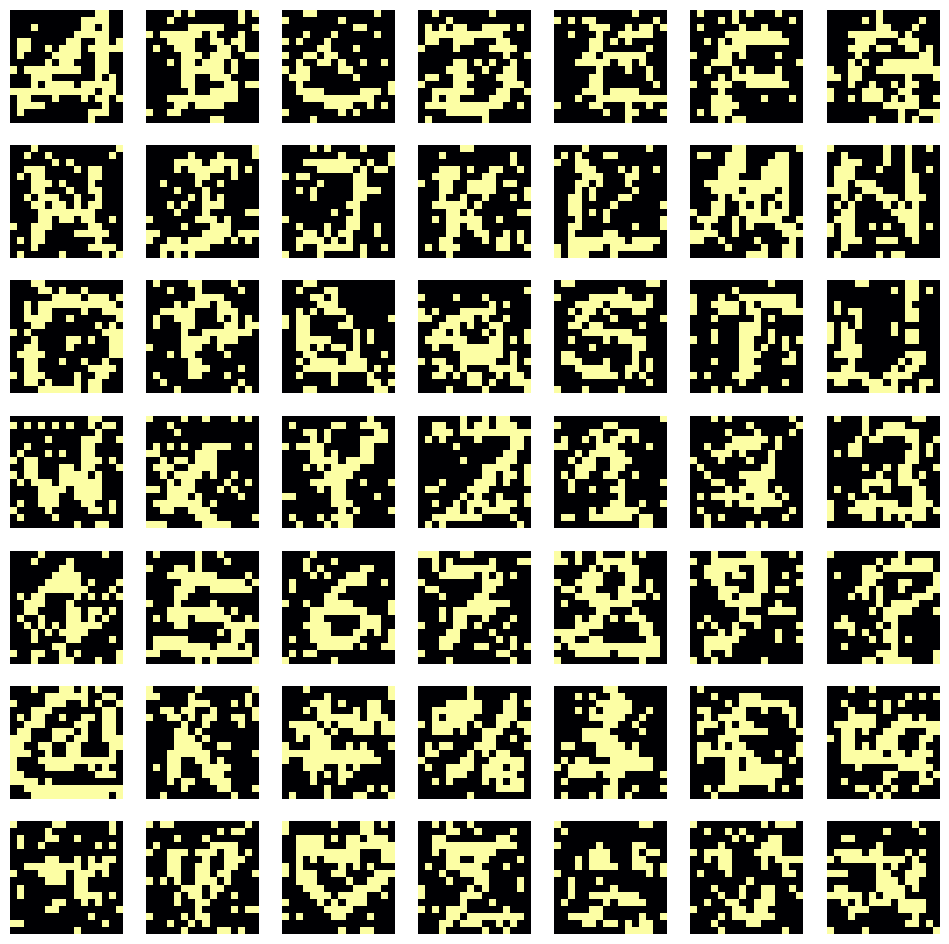

In [3]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(noised_data)):
  row, col = i // 7, i % 7
  axes[row, col].imshow(noised_data[i].reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

Model results:

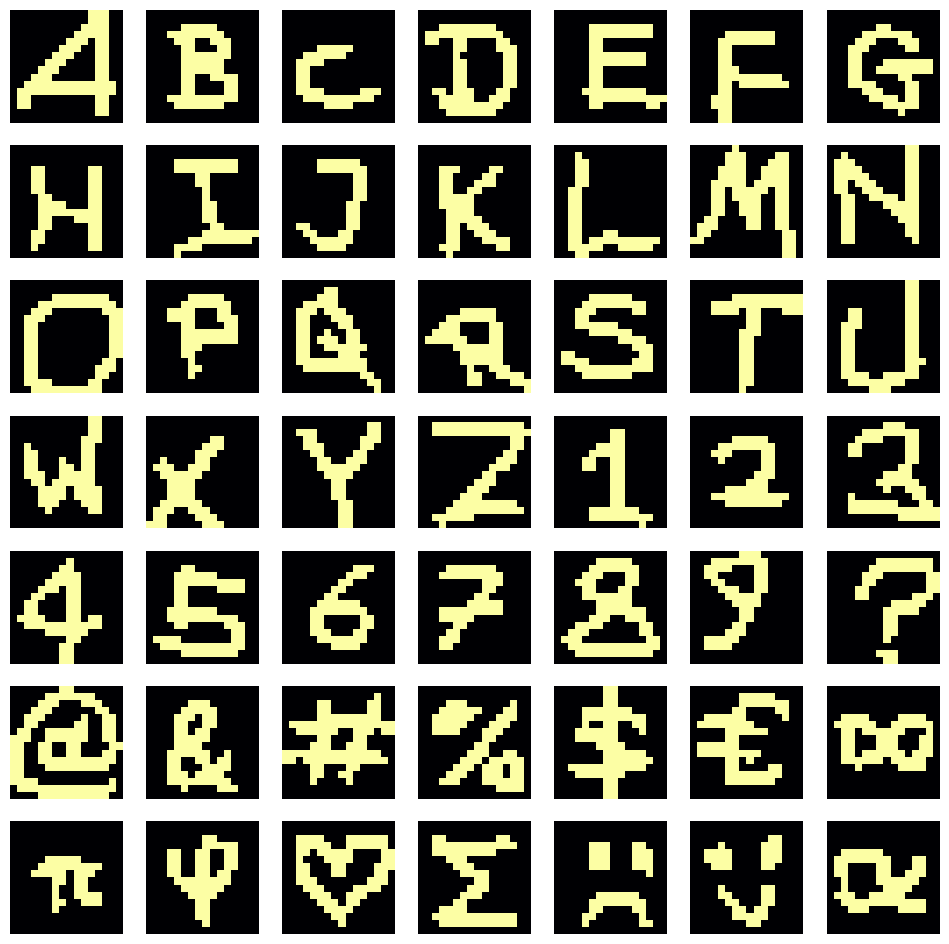

In [5]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(noised_data)):
  result, err = network1.hopfield_layer(noised_data[i],10)
  row, col = i // 7, i % 7
  axes[row, col].imshow(result.reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

Second dataset:

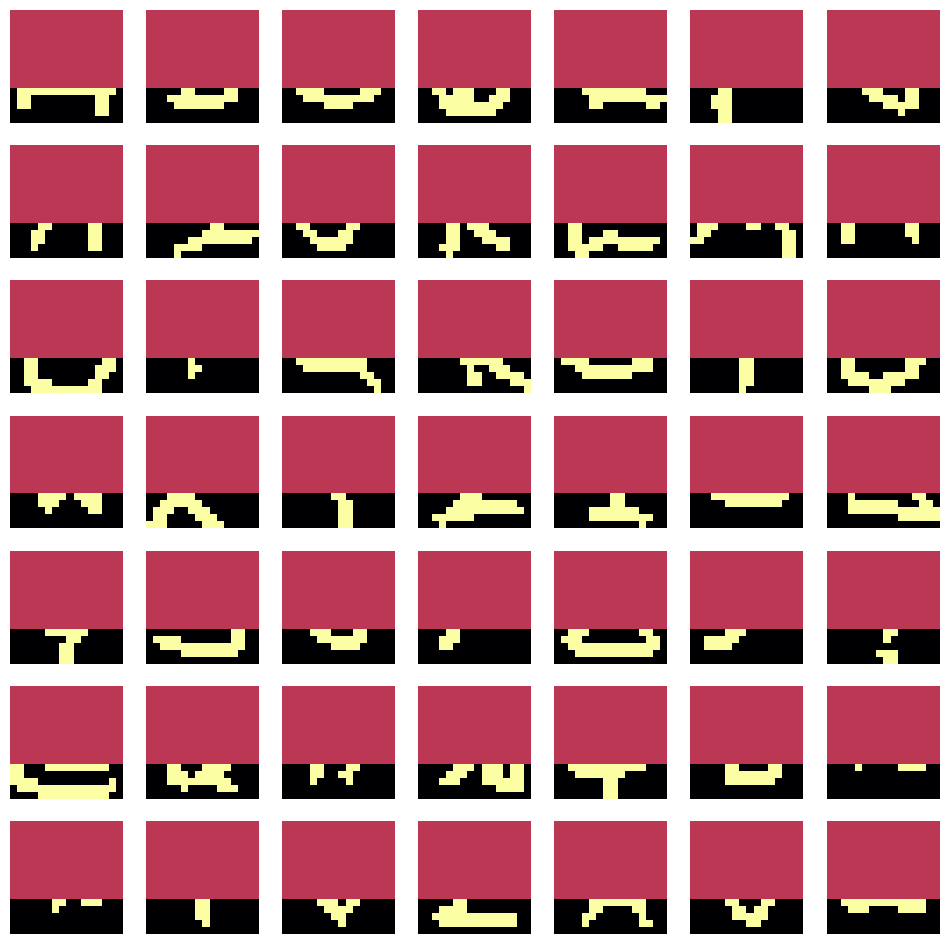

In [6]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(noised_data1)):
  row, col = i // 7, i % 7
  axes[row, col].imshow(hopf.cut(noised_data1[i],176).reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()

Model result:

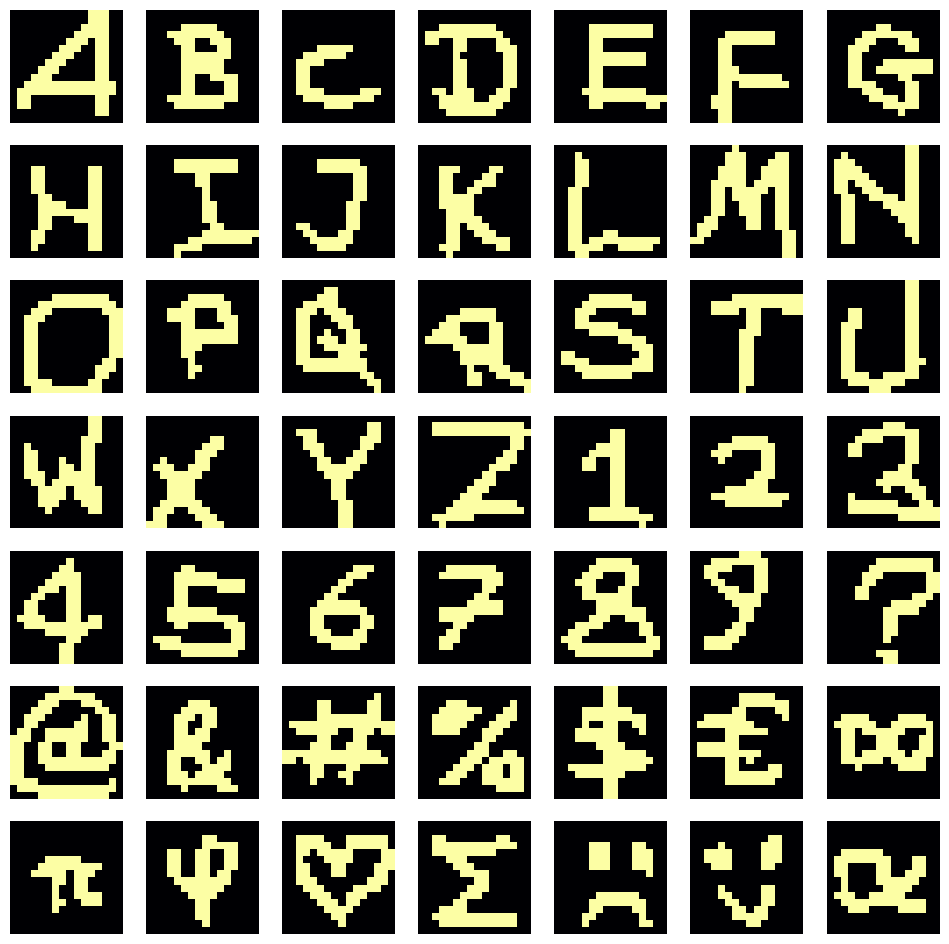

In [9]:
fig, axes = plt.subplots(7, 7, figsize=(12,12))

for i in range(len(noised_data1)):
  result, err = network1.hopfield_layer(hopf.cut(noised_data1[i],176),10)
  row, col = i // 7, i % 7
  axes[row, col].imshow(result.reshape(16, 16), cmap='inferno')
  axes[row, col].axis('off')
plt.show()